<a href="https://colab.research.google.com/github/christophersingh/Preliminary_Cardiovascular_Research/blob/main/Cardiovascular_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
""" Link To Kaggle Dataset: 
https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
"""

! pip install -q kaggle
from google.colab import files 
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d sulianova/cardiovascular-disease-dataset

!unzip cardiovascular-disease-dataset.zip

Saving kaggle.json to kaggle.json
  0% 0.00/742k [00:00<?, ?B/s]
100% 742k/742k [00:00<00:00, 51.2MB/s]
Archive:  cardiovascular-disease-dataset.zip
  inflating: cardio_train.csv        


Data description

Features:

    Age | age | int (days)
    Height | height | int (cm) |
    Weight | weight | float (kg) |
    Gender | gender | categorical code | 1: women, 2: man
    Systolic blood pressure | ap_hi | int |
    Diastolic blood pressure | ap_lo | int |
    Cholesterol | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | smoke | binary |
    Alcohol intake | alco | binary |
    Physical activity | active | binary |
    **Presence or absence of cardiovascular disease** | **Target Variable** | cardio | binary |

All of the dataset values were collected at the moment of medical examination. 

In [2]:
import pandas as pd

df = pd.read_csv('/content/cardio_train.csv',sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.drop("id",axis=1,inplace=True)

In [5]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Convert all columns to float64

In [6]:
df['age'] = df['age'].astype(float)
df['gender'] = df['gender'].astype(float)
df['height'] = df['height'].astype(float)
df['weight'] = df['weight'].astype(float)
df['ap_hi'] = df['ap_hi'].astype(float)
df['ap_lo'] = df['ap_lo'].astype(float)
df['cholesterol'] = df['cholesterol'].astype(float)
df['gluc'] = df['gluc'].astype(float)
df['smoke'] = df['smoke'].astype(float)
df['alco'] = df['alco'].astype(float)
df['active'] = df['active'].astype(float)
df['cardio'] = df['cardio'].astype(float)

Statistics By Column

In [7]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False


Check for any missing values

In [9]:
df.isna().any().any()

False

False output means that there are no missing values

Visualization 1: Group the data according to gender and count the rows. Then use a bar chart to see basic statistics by gender

In [10]:
dfGender = df.groupby('gender').std()

In [11]:
dfGender

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,,,,,,,,,,,
1.0,2432.024493,7.052726,14.238838,158.054522,174.776855,0.693417,0.582956,0.132431,0.157639,0.398481,0.499995
2.0,2529.752770,7.228895,14.187636,146.186152,211.557292,0.653764,0.551493,0.413496,0.308323,0.394734,0.499983


The bar graph below shows the counts of cardiovascular infections by gender and whether or not they have the disease

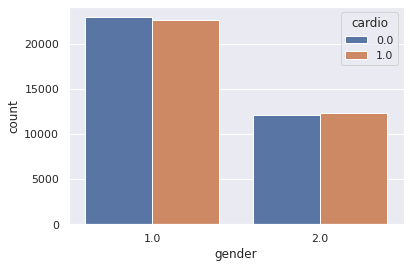

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
sns.countplot(x='gender', data=df, hue='cardio')
plt.show()

The graph below shows the counts of cardiovascular disease based on glucose sugar levels where the blue bar means they don't have the disease and the brown bar means they have it.

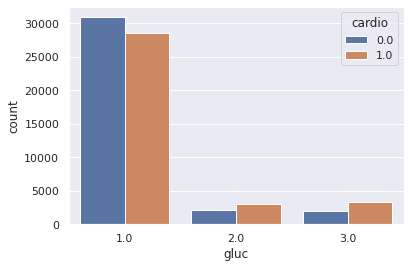

In [13]:
sns.countplot(x='gluc', hue='cardio', data=df)
plt.show()

For ML purposes remove the target variable (cardio) from the dataset

In [14]:
X = df.values[:, 0:11]
Y = df.values[:,-1]

Import decision tree library and fit data to the model

In [15]:
import sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [16]:
X_train

array([[1.6690e+04, 2.0000e+00, 1.6800e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.1361e+04, 2.0000e+00, 1.6500e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.7420e+04, 2.0000e+00, 1.7200e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.9457e+04, 1.0000e+00, 1.6500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0497e+04, 2.0000e+00, 1.6800e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.8322e+04, 1.0000e+00, 1.5000e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [17]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Make a prediction on the decision tree from the X_test variable

In [18]:
y_pred = dt.predict(X_test)

Print out confusion matrix for the decision tree

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix
result = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(result, predictions)

array([[6580, 3864],
       [3988, 6568]])

Import Naive Bayes Classifier and fit the data

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, Y);

Make a prediction

In [21]:
y_pred = model.predict(X_test)

View the confusion matrix for the model

In [22]:
result = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(result, predictions)

array([[9273, 1171],
       [7503, 3053]])